In [10]:
# Defining unique values of the categorical variables
se_status_u = ['Rich','Poor','Affluent']
purchase_u = ['yes','no','yes']


In [11]:
# Creating the dataframe with 10,000 rows and 2 columns viz. purchase and se_status
import random
import pandas as pd

se_status = []
purchase = []
for i in range(10000):
    se_status.append(random.choice(se_status_u))
    purchase.append(random.choice(purchase_u))
df = pd.DataFrame({'se_status':se_status,'purchase':purchase})

In [22]:
# Raw calculation for calculating initial entropy of the dataframe

import numpy as np
y_u = list(df['purchase'].unique())
p = [df[df['purchase'] == res].shape[0]/df.shape[0] for res in y_u]
entropy = np.sum([-(e*np.log2(e)) for e in p])

In [57]:
# Function for calculating initial entropy of the dataframe

def int_entropy(df, ycol):
    y_u = list(df[ycol].unique())
    p = [df[df[ycol] == res].shape[0]/df.shape[0] for res in y_u]
    entropy = np.sum([-(e*np.log2(e)) for e in p]) 
    return entropy
df_int_entropy = int_entropy(df,'purchase')
df_int_entropy

0.9197555231809029

In [38]:
# Unique groups for the 2 columns
groups = []
for group,values in df.groupby(['purchase','se_status']):
    print(group)
    groups.append(group)

('no', 'Affluent')
('no', 'Poor')
('no', 'Rich')
('yes', 'Affluent')
('yes', 'Poor')
('yes', 'Rich')


In [58]:
# Raw calculation for calculating entropy of a particular column of the dataframe

y_u = df['purchase'].unique()
col_u = df['se_status'].unique()
ent_colval = []
final_ent_col = 0 
for colval in col_u:
        p = [(df[(df['purchase'] == yval) & (df['se_status'] == colval)]).shape[0]/(df['se_status'] == colval).shape[0] for yval in y_u]
        ent_colval = np.sum([-(e*np.log2(e)) for e in p]) 
        final_ent_col += ent_colval* ((df[df['se_status'] == colval]).shape[0]/(df.shape[0]))
final_ent_col
        

0.8349566717020409

In [59]:
# Function for calculating entropy of a particular column of the dataframe

def col_entropy(df,ycol,col):
    y_u = df[ycol].unique()
    col_u = df[col].unique()
    ent_colval = []
    final_ent_col = 0 
    for colval in col_u:
            p = [(df[(df[ycol] == yval) & (df[col] == colval)]).shape[0]/(df[col] == colval).shape[0] for yval in y_u]
            ent_colval = np.sum([-(e*np.log2(e)) for e in p]) 
            final_ent_col += ent_colval* ((df[df[col] == colval]).shape[0]/(df.shape[0]))
    return final_ent_col  

df_se_entropy = col_entropy(df,'purchase','se_status')
print(df_int_entropy)
information_gain = df_int_entropy - df_se_entropy
print(information_gain)

0.9197555231809029
0.08479885147886201


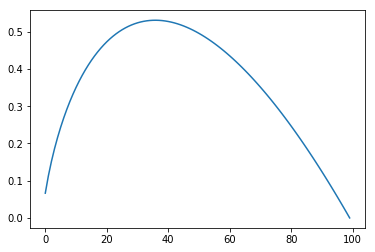

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
entropies = [-(p/100)*np.log2(p/100) for p in range(1,101)]
plt.plot(entropies)

$$ initEnt = \sum \limits_{i=1}^{n} {p_i*log_{2}p_i} $$

$$ catEnt =\sum \limits_{j=1}^{m} (f_j*(\sum \limits_{i=1}^{n} {p_{ij}*log_{2}p_{ij}})) $$